Before running analysis, I cleaned the data in sql and OpenRefine.

I parsed all the specimen citations discovered using the ner model into separate rows with the same publication metadata. I removed false positives. And I joined the specimen data with the bibliography of our publications to gain insights from the journals, publication date, paper sections, etc. 

I then transformed the cleaned results into more specific analytics in sql, exported the results, and illustrated the results here in matplotlib.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
section = pd.read_csv ('frequency_by_section.csv')
section

,Section,Frequency
0,Introduction and Background,59
1,Materials and Methods,148
2,"Results, Discussion, and Conclusion",116
3,Figures and Tables,2226
4,Section Unknown,1574


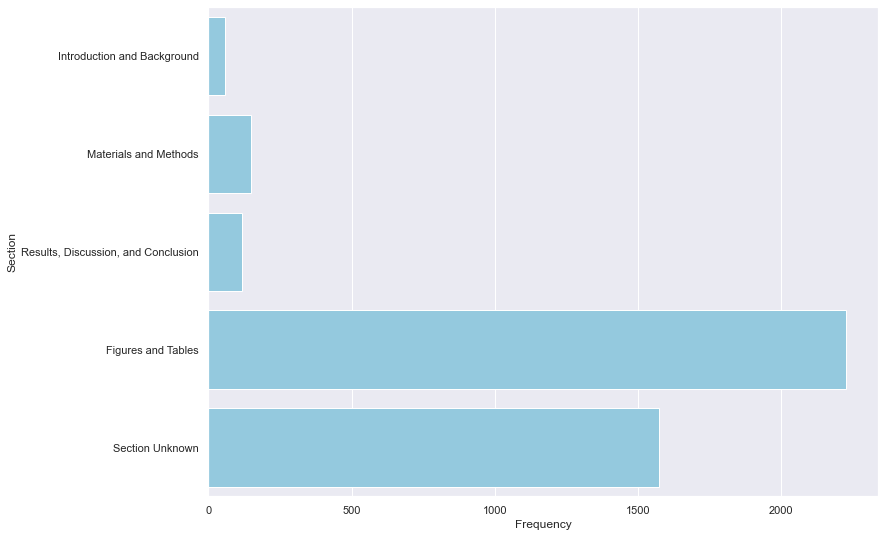

In [6]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(data=section, y='Section', x='Frequency', color='skyblue')
plt.savefig("frequency_by_section")

In [7]:
journal = pd.read_csv ('frequency_by_journal.csv')
journal

,Journal,Frequency
0,Zookeys,829
1,Bull. Am. Mus. Nat. Hist.,296
2,Zootaxa,272
3,Am. Mus. Novit.,238
4,Zool. J. Linn. Soc.,151
5,J. Morphol.,130
6,J. Paleontol.,130
7,PLoS One,110
8,J. Mammal.,109
9,J. Molluscan Stud.,73


[Text(0, 0, '829'),
 Text(0, 0, '296'),
 Text(0, 0, '272'),
 Text(0, 0, '238'),
 Text(0, 0, '151'),
 Text(0, 0, '130'),
 Text(0, 0, '130'),
 Text(0, 0, '110'),
 Text(0, 0, '109'),
 Text(0, 0, '73'),
 Text(0, 0, '72'),
 Text(0, 0, '46'),
 Text(0, 0, '37'),
 Text(0, 0, '32'),
 Text(0, 0, '30'),
 Text(0, 0, '28'),
 Text(0, 0, '22'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '16')]

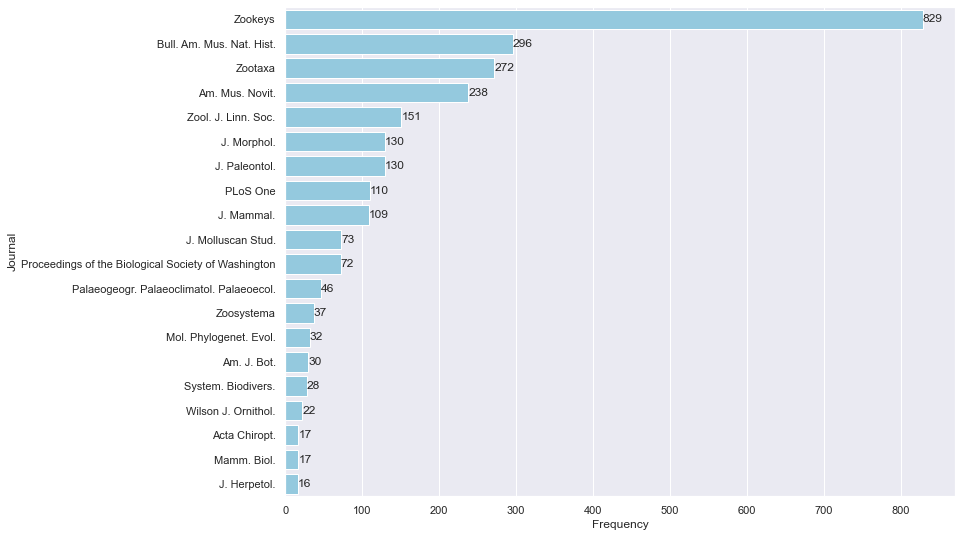

In [9]:
ax = sns.barplot(data=journal, y='Journal', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
##plt.savefig("frequency_by_journal")

In [12]:
journal_ummz = pd.read_csv ('frequency_by_journal_ummz.csv')
journal_ummz

,Journal,Frequency
0,J. Mammal.,32
1,Am. Mus. Novit.,8
2,Bull. Am. Mus. Nat. Hist.,7
3,Zool. J. Linn. Soc.,3
4,Mamm. Biol.,3
5,J. Herpetol.,2
6,Conserv. Genet. Resour.,2
7,Zookeys,2
8,Southwest. Nat.,1
9,Proceedings of the National Academy of Sciences,1


[Text(0, 0, '32'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

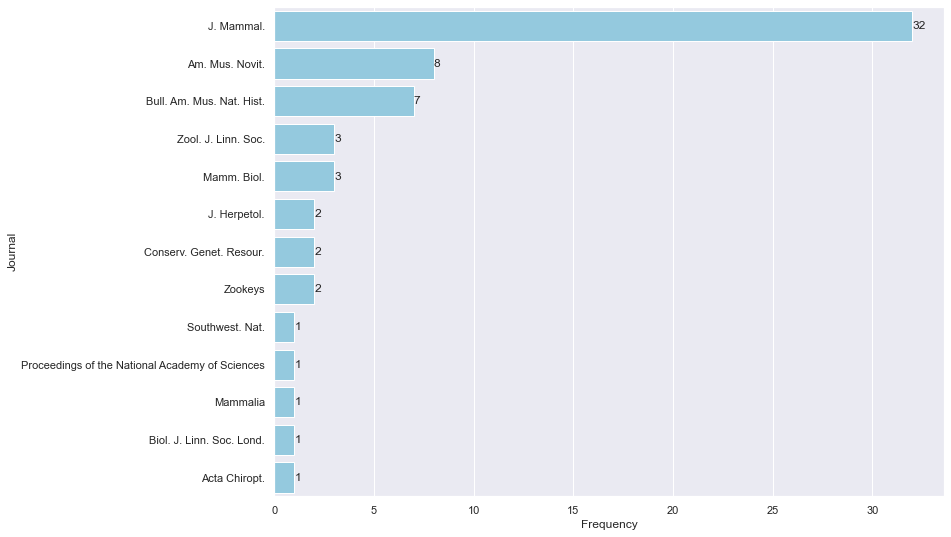

In [13]:
ax = sns.barplot(data=journal_ummz, y='Journal', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
##plt.savefig("frequency_by_journal_ummz")

In [14]:
year = pd.read_csv ('frequency_by_year.csv')
year

,publication_Year,Frequency
0,1960,1
1,1965,2
2,1966,1
3,1967,1
4,1969,23
5,1973,6
6,1975,16
7,1979,3
8,1981,2
9,1982,3


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '23'),
 Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '21'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '18'),
 Text(0, 0, '1'),
 Text(0, 0, '31'),
 Text(0, 0, '47'),
 Text(0, 0, '142'),
 Text(0, 0, '216'),
 Text(0, 0, '359'),
 Text(0, 0, '573'),
 Text(0, 0, '210'),
 Text(0, 0, '381'),
 Text(0, 0, '91'),
 Text(0, 0, '224'),
 Text(0, 0, '302'),
 Text(0, 0, '176'),
 Text(0, 0, '2'),
 Text(0, 0, '72')]

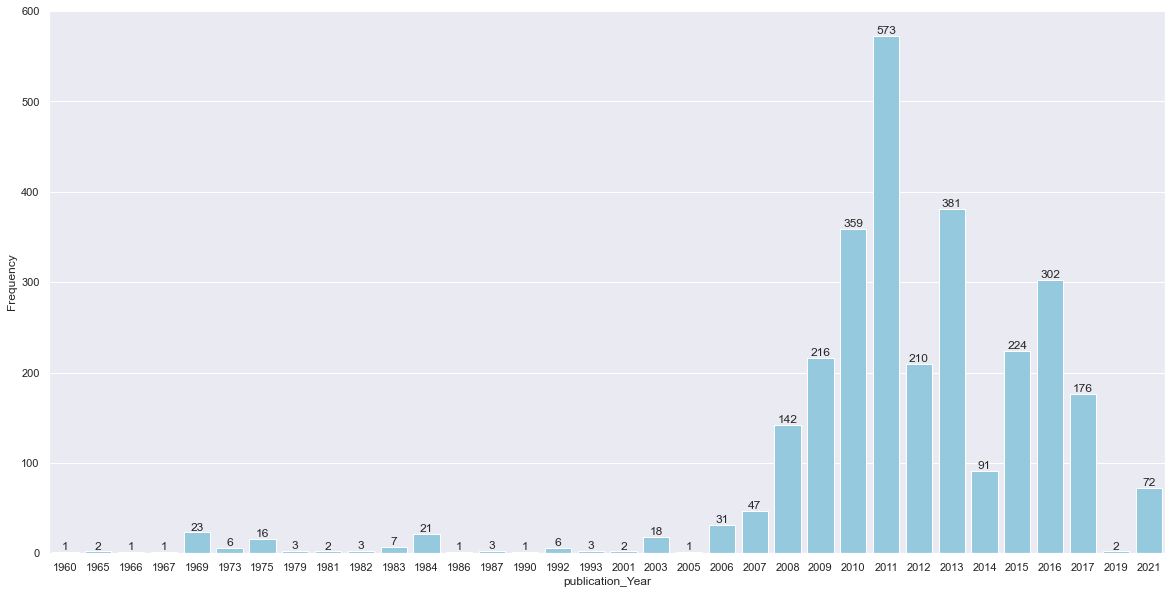

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(data=year, x='publication_Year', y='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
##plt.savefig("frequency_by_journal_ummz")

In [19]:
year_ummz = pd.read_csv ('frequency_by_year_ummz.csv')
year_ummz

,publication_Year,Frequency
0,1960,1
1,1965,2
2,1966,1
3,1967,1
4,1969,3
5,1973,2
6,1975,14
7,1979,3
8,1981,1
9,1984,3


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '14'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '5')]

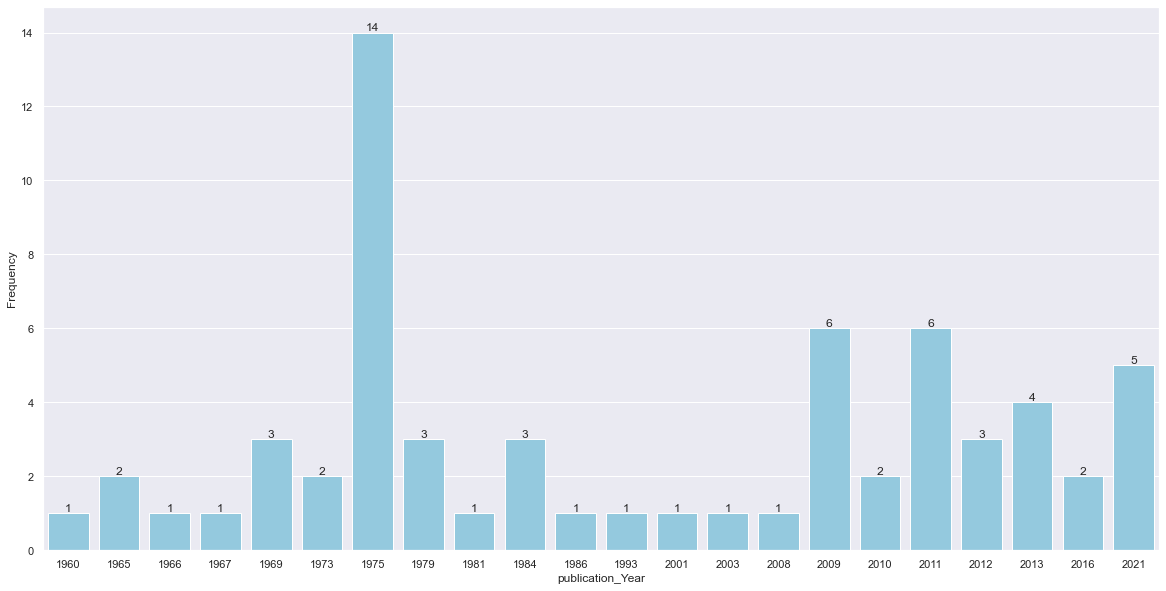

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(data=year_ummz, x='publication_Year', y='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
##plt.savefig("frequency_by_journal_ummz")